# Exploratory Data Analysis: Haberman's Dataset

#### ***Haberman's Dataset contains the data of the Breast Cancer Patients who had undergone Surgery.***

***Import Packages***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

***Load in dataset and call it haberman_data***

ensure you pass in the parameter header

In [2]:
haberman_data = pd.read_csv('datasets_474_966_haberman.csv')

***Check out head of data***

In [3]:
haberman_data.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


***Rename Column***

age = Age of patient

op_yr = Operation year;

ax = Number of Axil Nodes that are detected;

status = Survival Status of the patient after 5 years

In [4]:
colums = ['age', 'op_yr', 'ax', 'status']

In [5]:
haberman_data = pd.read_csv('datasets_474_966_haberman.csv', names=colums)

In [6]:
haberman_data.head()

,age,op_yr,ax,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


,age,op_yr,ax,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


***shape of the dataset***

In [7]:
haberman_data.shape

(306, 4)

***Check out the status column and see how it is classified***

In [8]:
haberman_data['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

***Replace the status values***

1 == Survived

2 == Not_survived

In [9]:
status_map = {1 : 'Survied', 2: 'Not_survived'}

haberman_data['status'] = haberman_data['status'].map(status_map)

***Print out the percentage of data classified***

In [10]:
haberman_data['status'].value_counts()

Survied         225
Not_survived     81
Name: status, dtype: int64

In [11]:
total_num_status = len(haberman_data['status'])
num_survived = len(haberman_data['status'].loc[haberman_data['status'] == 'Survied'])
num_not_survived = len(haberman_data['status'].loc[haberman_data['status'] == 'Not_survived'])

print('The percentage of patient that survived the surgery {} %'.format(round((num_survived/total_num_status)*100, 2)))
print('The percentage of patient that did not survived the surgery {}%'.format(round((num_not_survived/total_num_status)*100, 2)))

The percentage of patient that survived the surgery 73.53 %
The percentage of patient that did not survived the surgery 26.47%


***Observation:***
input your observation below

* the Data is imbalanced 

* 73.53 % of our data survived the sugery

***Check the description of the data***

In [12]:
haberman_data.describe()

,age,op_yr,ax
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


***Observation:*** input your observation below

* average age of those that did the surgery is 52.47
* the range of thuse that did the surgery are between the age of 30 - 83
* surgery was only done between 1958 - 1969

# Univariate Analysis :

### Histogram

***Reproduce the following Figures***

In [14]:
sns.set_style('whitegrid')

Text(0.5, 0, 'Age of Patient')

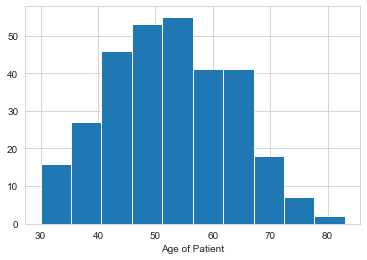

In [15]:
plt.hist(haberman_data.age)
plt.xlabel('Age of Patient')

***Hint: Use seaborn FacetGrid***

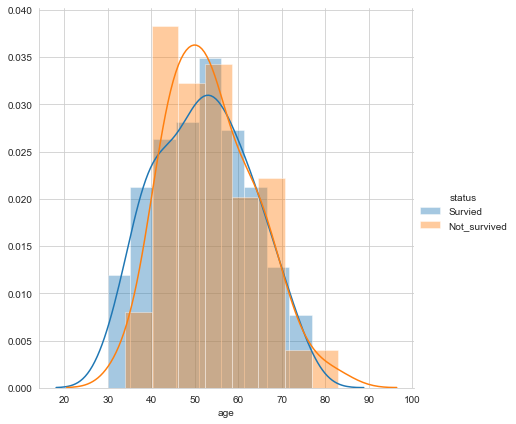

In [16]:
g = sns.FacetGrid(haberman_data ,hue="status",height=6)
g.map(sns.distplot, 'age').add_legend()

***Observation:*** input your observation below

* most of the patient are between the age of 40 - 65
* 

***Reproduce this figures***

Text(0.5, 0, 'Year of Operation')

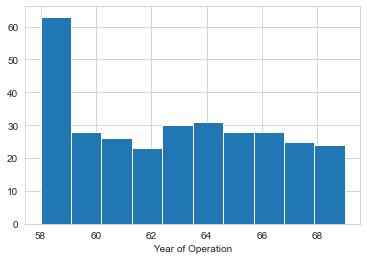

In [17]:
plt.hist(haberman_data.op_yr)
plt.xlabel('Year of Operation')

***Hint: Use seaborn FacetGrid***

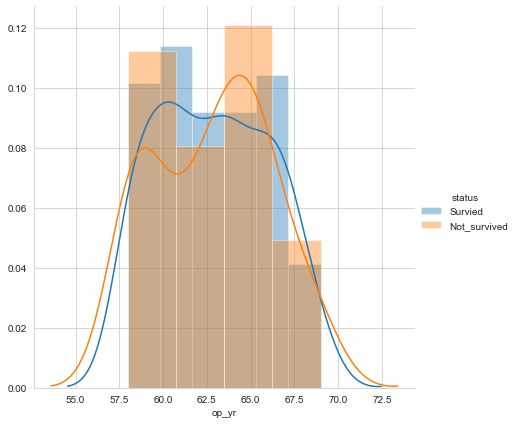

In [50]:
g = sns.FacetGrid(haberman_data ,hue="status",height=6)
g.map(sns.distplot, 'op_yr').add_legend()

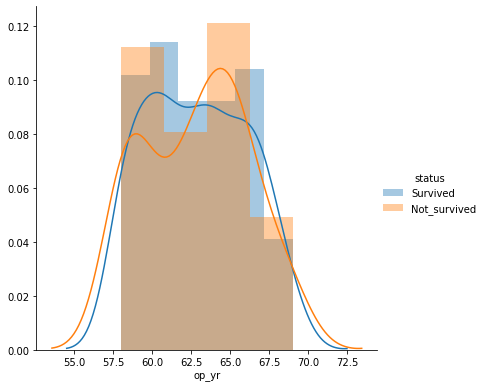

***Observation:*** input your observation below

* in 1958 there was a very high number of operation caried out compared to other years so far
* the highest number of those that survived are between the year 1958 - 1966
* there was an increace in death in the year 1965

***Reproduce the following figures***

Text(0.5, 0, 'Axil Nodes')

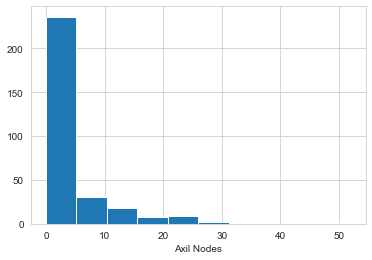

In [18]:
plt.hist(haberman_data.ax)
plt.xlabel('Axil Nodes')

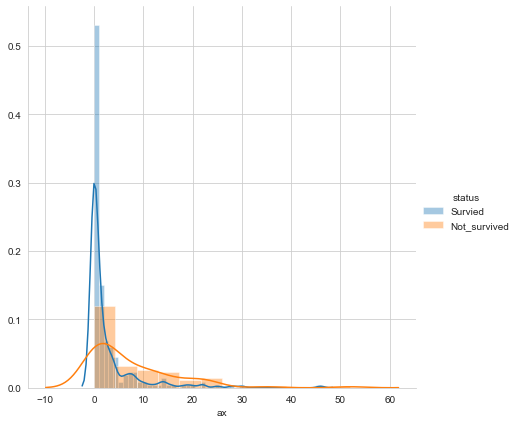

In [19]:
g = sns.FacetGrid(haberman_data ,hue="status",height=6)
g.map(sns.distplot, 'ax').add_legend()

***Observation:*** input your observation below

* most of the case operated on only had 5 Number of Axil Nodes that are detected
* those detected Axil Nodes of 5 have a very high probability of surviving and only few don't survive

# Probability Density Function & Commulative Density Function

## Read Through

***Segregate the data based on the Class Label i.e. Survival Status***

In [20]:
haberman_data_Survived=haberman_data.loc[haberman_data["status"]=="Survied"]
haberman_data_Not_Survived=haberman_data.loc[haberman_data["status"]=="Not_survived"]

***Plotting the PDF,CDF for Age of Patient for the above Segregated Data***

In [21]:
density_age_survived,bin_edges_age_survived=np.histogram(
    haberman_data_Survived['age'],
    bins=10,
    density=True)

pdf_age_survived=(density_age_survived)/(sum(density_age_survived))

In [22]:
density_Age_Not_Survived,bin_Edges_Age_Not_Survived=np.histogram(
    haberman_data_Not_Survived['age'],
    bins=10,
    density=True)

pdf_Age_Not_Survived=(density_Age_Not_Survived)/(sum(density_Age_Not_Survived))

In [23]:
print("Bin Edges Survived : {}\n".format(bin_edges_age_survived))
print("PDF Survived : {}\n".format(pdf_age_survived))
print("Bin Edges Not Survived :{}\n".format(bin_Edges_Age_Not_Survived))
print("PDF Not Survived : {}\n".format(pdf_Age_Not_Survived))

Bin Edges Survived : [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]

PDF Survived : [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]

Bin Edges Not Survived :[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]

PDF Not Survived : [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]



In [24]:
cdf_Age_Not_Survived=np.cumsum(pdf_Age_Not_Survived)
cdf_age_survived=np.cumsum(pdf_age_survived)

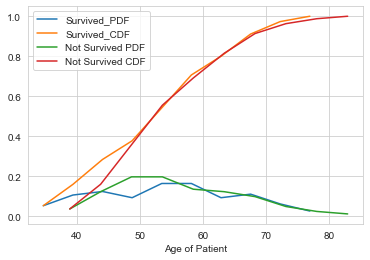

In [25]:
plt.plot(bin_edges_age_survived[1:],pdf_age_survived)
plt.plot(bin_edges_age_survived[1:],cdf_age_survived)
plt.plot(bin_Edges_Age_Not_Survived[1:],pdf_Age_Not_Survived)
plt.plot(bin_Edges_Age_Not_Survived[1:],cdf_Age_Not_Survived)
plt.xlabel('Age of Patient')
plt.legend(['Survived_PDF','Survived_CDF','Not Survived PDF','Not Survived CDF'])

***Observation :***

* The Survival chances are high for the patients having age less than 40 years.

### To Do 👇

***Plotting the PDF,CDF for Year of Operation for the above Segregated Data***

In [26]:
density_age_survived,bin_edges_age_survived=np.histogram(
    haberman_data_Survived['op_yr'],
    bins=10,
    density=True)

pdf_age_survived=(density_age_survived)/(sum(density_age_survived))

In [27]:
density_Age_Not_Survived,bin_Edges_Age_Not_Survived=np.histogram(
    haberman_data_Not_Survived['op_yr'],
    bins=10,
    density=True)

pdf_Age_Not_Survived=(density_Age_Not_Survived)/(sum(density_Age_Not_Survived))

In [28]:
print("Bin Edges Survived : {}\n".format(bin_edges_age_survived))
print("PDF Survived : {}\n".format(pdf_age_survived))
print("Bin Edges Not Survived :{}\n".format(bin_Edges_Age_Not_Survived))
print("PDF Not Survived : {}\n".format(pdf_Age_Not_Survived))

Bin Edges Survived : [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]

PDF Survived : [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]

Bin Edges Not Survived :[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]

PDF Not Survived : [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]



In [29]:
cdf_Age_Not_Survived=np.cumsum(pdf_Age_Not_Survived)
cdf_age_survived=np.cumsum(pdf_age_survived)

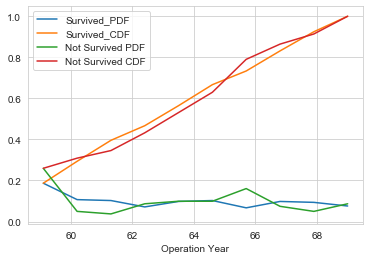

In [30]:
plt.plot(bin_edges_age_survived[1:],pdf_age_survived)
plt.plot(bin_edges_age_survived[1:],cdf_age_survived)
plt.plot(bin_Edges_Age_Not_Survived[1:],pdf_Age_Not_Survived)
plt.plot(bin_Edges_Age_Not_Survived[1:],cdf_Age_Not_Survived)
plt.xlabel('Operation Year')
plt.legend(['Survived_PDF','Survived_CDF','Not Survived PDF','Not Survived CDF'])

***Observation :*** Input your answer below

* irrespective of the year of operation the probability of surviving and not-surviving is the same

***Plotting the PDF,CDF for Axil Nodes for the above Segregated Data***

In [33]:
density_age_survived,bin_edges_age_survived=np.histogram(
    haberman_data_Survived['ax'],
    bins=10,
    density=True)

pdf_age_survived=(density_age_survived)/(sum(density_age_survived))

In [34]:
density_Age_Not_Survived,bin_Edges_Age_Not_Survived=np.histogram(
    haberman_data_Not_Survived['ax'],
    bins=10,
    density=True)

pdf_Age_Not_Survived=(density_Age_Not_Survived)/(sum(density_Age_Not_Survived))

In [35]:
print("Bin Edges Survived : {}\n".format(bin_edges_age_survived))
print("PDF Survived : {}\n".format(pdf_age_survived))
print("Bin Edges Not Survived :{}\n".format(bin_Edges_Age_Not_Survived))
print("PDF Not Survived : {}\n".format(pdf_Age_Not_Survived))

Bin Edges Survived : [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]

PDF Survived : [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]

Bin Edges Not Survived :[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]

PDF Not Survived : [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]



In [36]:
cdf_Age_Not_Survived=np.cumsum(pdf_Age_Not_Survived)
cdf_age_survived=np.cumsum(pdf_age_survived)

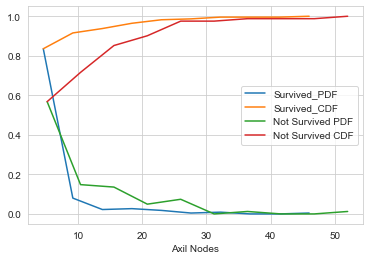

In [37]:
plt.plot(bin_edges_age_survived[1:],pdf_age_survived)
plt.plot(bin_edges_age_survived[1:],cdf_age_survived)
plt.plot(bin_Edges_Age_Not_Survived[1:],pdf_Age_Not_Survived)
plt.plot(bin_Edges_Age_Not_Survived[1:],cdf_Age_Not_Survived)
plt.xlabel('Axil Nodes')
plt.legend(['Survived_PDF','Survived_CDF','Not Survived PDF','Not Survived CDF'])

***Observation :*** Input your answer below

* Major concentration of the patients are having less than 5 Positively detected Axil Nodes.
* Patients having less than 5 Positively Detected Axil Nodes have the highest survival rate (~82%).

## Box Plot

***Reproduce the following Images***

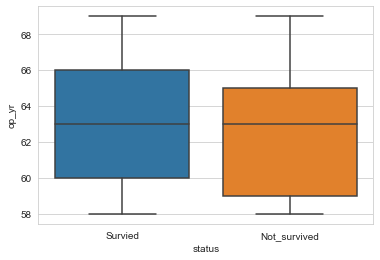

In [74]:
sns.boxplot(x='status', y='op_yr', data=haberman_data)

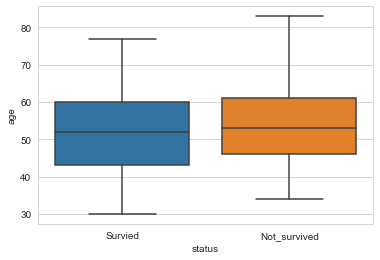

In [76]:
sns.boxplot(x='status', y='age', data=haberman_data)

***Observation :*** Input Your answer below

* 
* 
* 

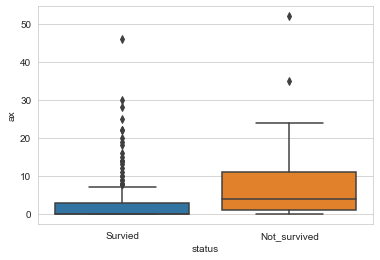

In [77]:
sns.boxplot(x='status', y='ax', data=haberman_data)

***Observation :*** Input Your answer below

* 
* 

## Violin Plots

***Reproduce the following images***

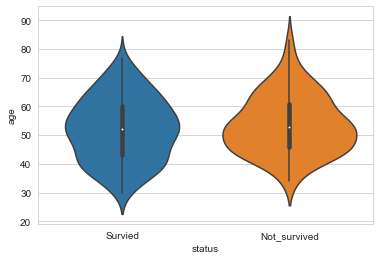

In [79]:
sns.violinplot(x='status', y='age', data=haberman_data)

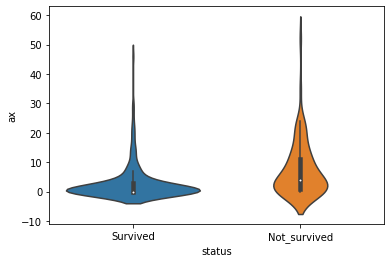

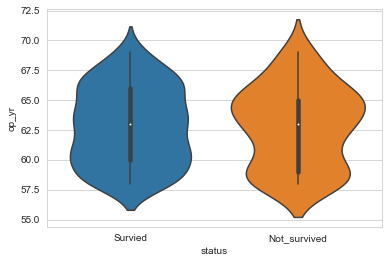

In [80]:
sns.violinplot(x='status', y='op_yr', data=haberman_data)

***Observation :*** Input your answer below

* 
* 

# Bivariate Analysis

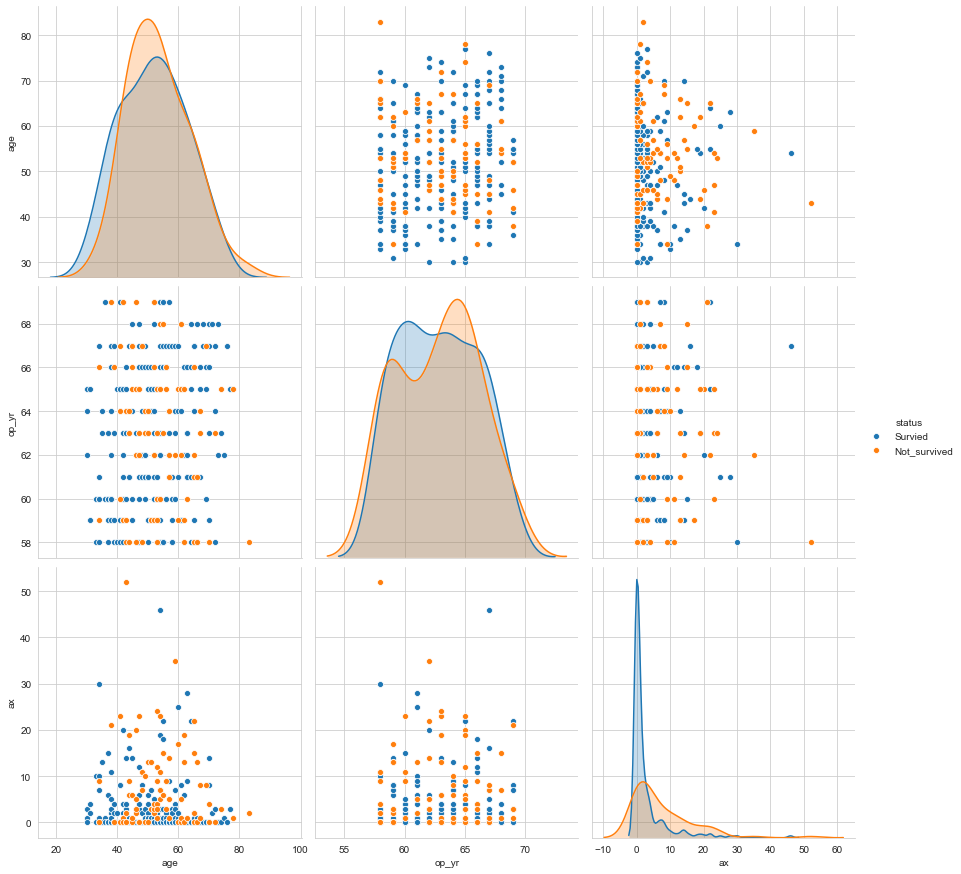

In [84]:
sns.pairplot(haberman_data, hue='status', height=4)

***Hint: Use FacetGrid***

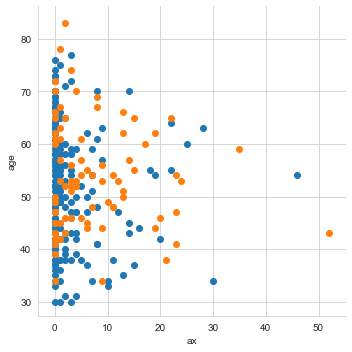

In [46]:
g = sns.FacetGrid(haberman_data, height=5, hue='status')
#g.map(sns.scatterplot, 'ax')
g.map(plt.scatter, 'ax', 'age')

***Rename Column***

age = Age of patient

op_yr = Operation year;

ax = Number of Axil Nodes that are detected;

status = Survival Status of the patient after 5 years

***Observation :*** Input your answer below

* 
* 

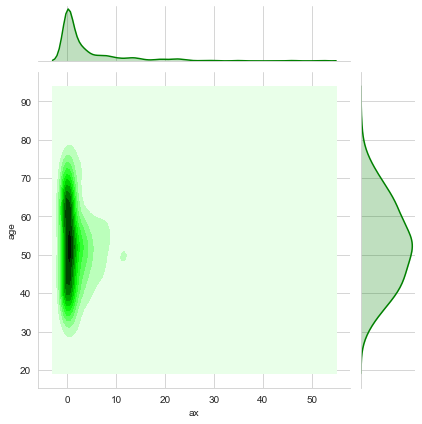

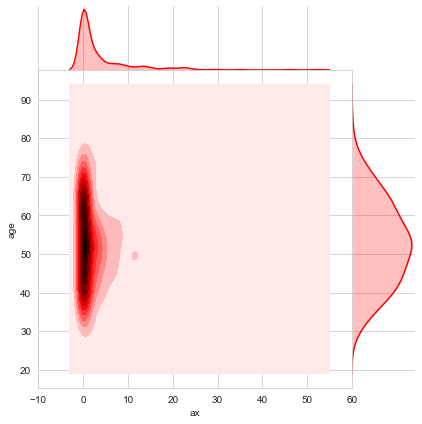

In [96]:
sns.jointplot( 'ax','age', data=haberman_data, kind='kde', color='green')

sns.jointplot( x='ax',y='age', data=haberman_data, kind='kde', color='red', xlim=(-10, 60), space=0)


***Observation :*** Input your answer below

* 
* 
* 

# Great Job!!!

***Final Conclusions :***

* Haberman's Dataset is Imbalanced Dataset and 73.5% of the patients have survived after the surgery.
* Age of patients is in the range of 30 to 83.
* Operation's are performed during the period 1958-1969.
* The minimum number of Axil Nodes is 0 and maximum is 52 with a mean of 4 axil nodes and 75% patients have less than 5 Axil Nodes.
* Patients aged between 40 and 55 are more in number.
* Patients with age less than 40 years have more chances of survival.
* Major concentration of the patients are having less than 5 Positively detected Axil Nodes.
* Patients having less than 5 Positively Detected Axil Nodes have the highest survival rate (~82%).
* Exact inferences can't be drawn from the above plots.As this is Imbalanced dataset and all the parameters are overlapped, by considering only one parameter we can't infer correctly. The combination of parameters under conditions can infer better.
* Number of Positively Detected Axil Nodes and Age of Patient are the two important parameters, which when combinedly used under conditions can infer better in building a model.